In [40]:
import pandas as pd

In [41]:
df = pd.read_csv("../data/average-monthly-surface-temperature.csv")

In [42]:
pais = ["New Zealand"]
df_filtrado = df[df["Entity"].isin(pais)]

In [43]:
# Verificando se está pegando o pais de escolha
print(df_filtrado.head())

             Entity Code  year         Day  Average surface temperature daily  \
128520  New Zealand  NZL  1940  1940-01-15                          15.063309   
128521  New Zealand  NZL  1940  1940-02-15                          14.673057   
128522  New Zealand  NZL  1940  1940-03-15                          12.724645   
128523  New Zealand  NZL  1940  1940-04-15                           9.152965   
128524  New Zealand  NZL  1940  1940-05-15                           7.119649   

        Average surface temperature monthly  
128520                             9.063537  
128521                             9.063537  
128522                             9.063537  
128523                             9.063537  
128524                             9.063537  


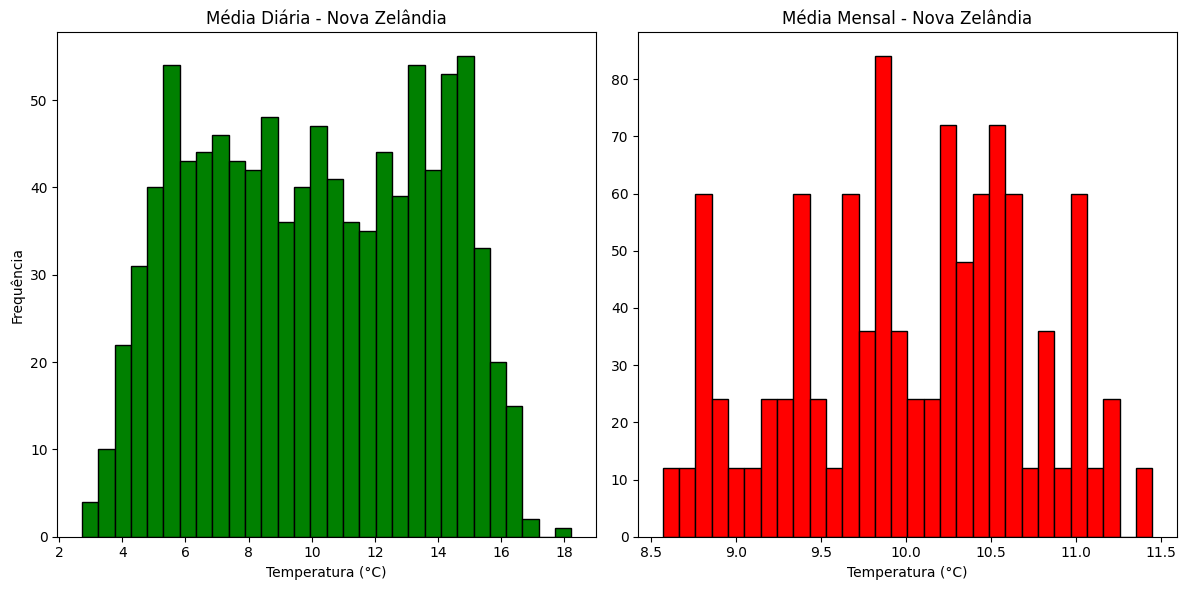

In [44]:
# Importar método de gerar histograma
from Funcoes import gerar_histogramas

# Gerar histograma do pais selecionado "Contém outliers"
gerar_histogramas("Nova Zelândia", df_filtrado)

In [45]:
# Importar método de identificar outliers
from Funcoes import identificar_outliers

# Função para identificar outliers
outliers_diario = identificar_outliers(df_filtrado['Average surface temperature daily'], 1.5)
outliers_mensal = identificar_outliers(df_filtrado['Average surface temperature monthly'], 1.5)

# Printando os outliers
print(f"Outliers diários:\n {outliers_diario}")
print(f"\nOutliers mensais:\n {outliers_mensal}")

Outliers diários:
 Series([], Name: Average surface temperature daily, dtype: float64)

Outliers mensais:
 Series([], Name: Average surface temperature monthly, dtype: float64)


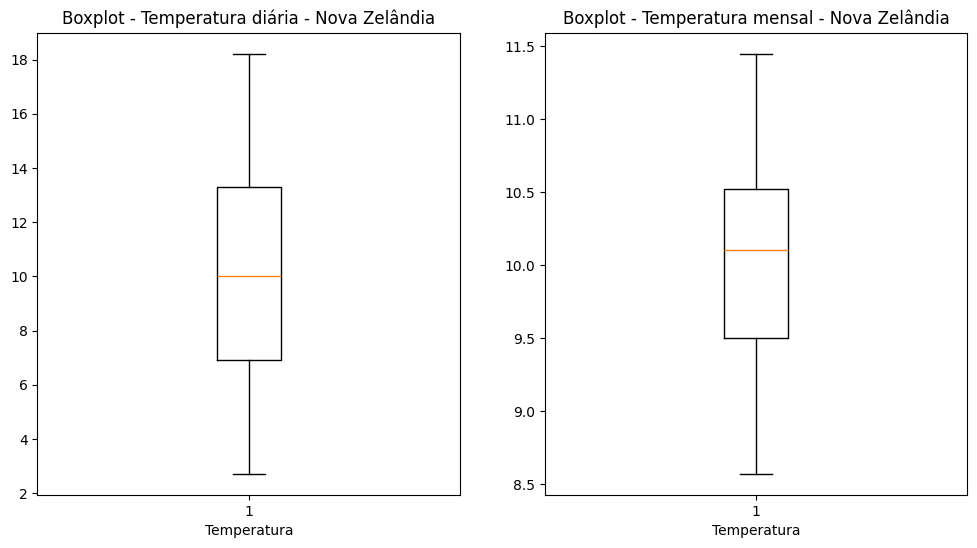

In [46]:
# Importar método de gerar boxplot "Contém outliers"
from Funcoes import gerar_boxplot

gerar_boxplot("Nova Zelândia", df_filtrado)

In [47]:
# Identificando outliers limite superior
from Funcoes import identificar_outliers_limite_superior

outliers_diario_superior = identificar_outliers_limite_superior(df_filtrado['Average surface temperature daily'])
outliers_mensal_superior = identificar_outliers_limite_superior(df_filtrado['Average surface temperature monthly'])
print(outliers_diario_superior)
print(outliers_mensal_superior)

Series([], Name: Average surface temperature daily, dtype: float64)
Series([], Name: Average surface temperature monthly, dtype: float64)


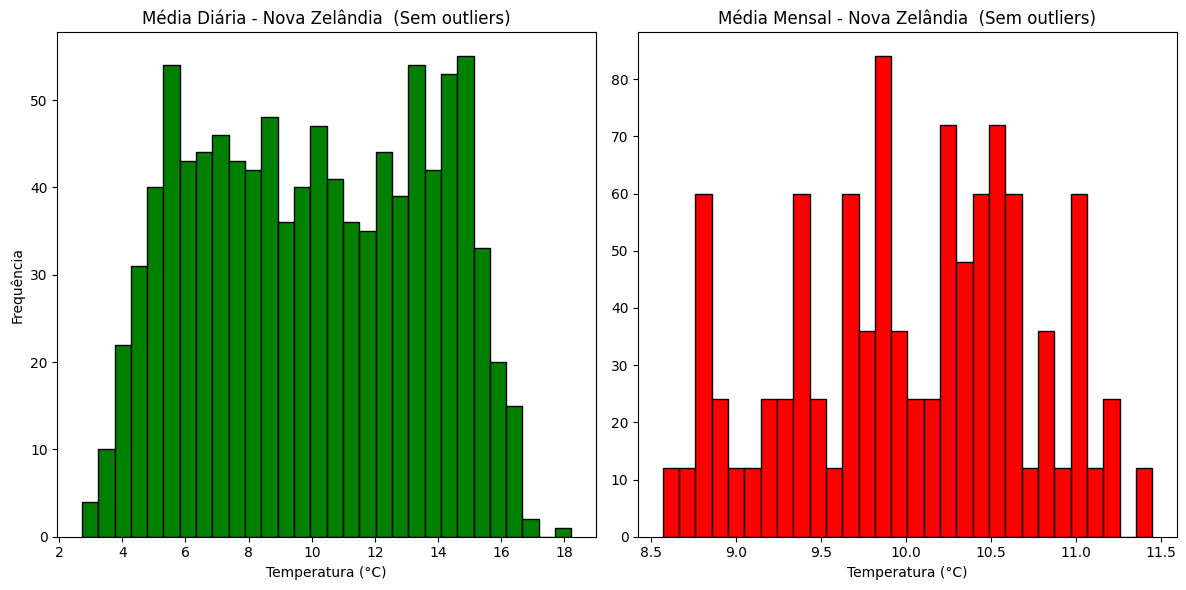

In [48]:
df_sem_outliers = df_filtrado[~df_filtrado['Average surface temperature daily'].isin(outliers_diario_superior)]
df_sem_outliers = df_sem_outliers[~df_sem_outliers['Average surface temperature monthly'].isin(outliers_mensal_superior)]

gerar_histogramas("Nova Zelândia  (Sem outliers)", df_sem_outliers)

In [49]:
# Importar metódo de análise de periodo
from Funcoes import analisar_periodo

mes_inicial, mes_final = analisar_periodo(df_sem_outliers, 'Day')


Período de análise:
Primeiro mês: 1940-01
Último mês: 2024-12


In [50]:
# Importar função para identificação de meses faltantes
from Funcoes import identificar_meses_faltantes

identificar_meses_faltantes(df_sem_outliers, 'Day')


Não há meses faltantes no conjunto de dados!


PeriodIndex([], dtype='period[M]')